In [1]:
#! pip install -U scikit-learn

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree

In [4]:
df = pd.read_csv("penguins.csv")
df.head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


# Exploratory Data Analysis (EDA)

In [7]:
df.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [8]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [10]:
sex_mapping = {'FEMALE': 0, 'MALE': 1}
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
island_mapping = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}

df['sex'] = df['sex'].map(sex_mapping)
df['species'] = df['species'].map(species_mapping)
df['island'] = df['island'].map(island_mapping)

In [11]:
# df["sex"], _ = pd.factorize(df["sex"])
# df["species"], _ = pd.factorize(df["species"])
# df["island"], _ = pd.factorize(df["island"])

In [12]:
df.head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,1
1,0,0,39.5,17.4,186.0,3800.0,0
2,0,0,40.3,18.0,195.0,3250.0,0
4,0,0,36.7,19.3,193.0,3450.0,0


In [13]:
df.island.unique()

array([0, 1, 2], dtype=int64)

<IPython.core.display.Javascript object>


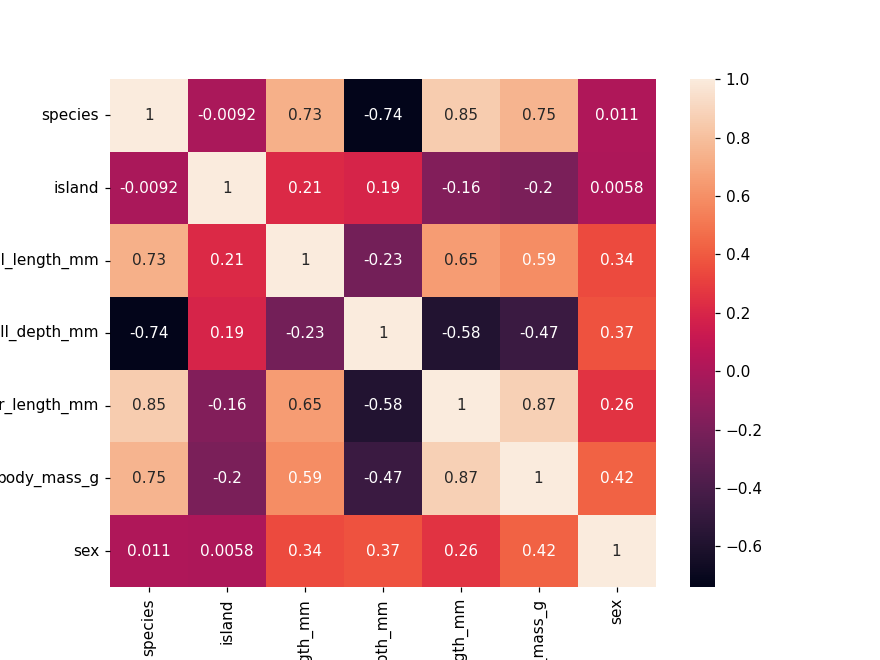

<AxesSubplot:>

In [14]:
df2 = df.corr()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df2, annot=True)

<IPython.core.display.Javascript object>


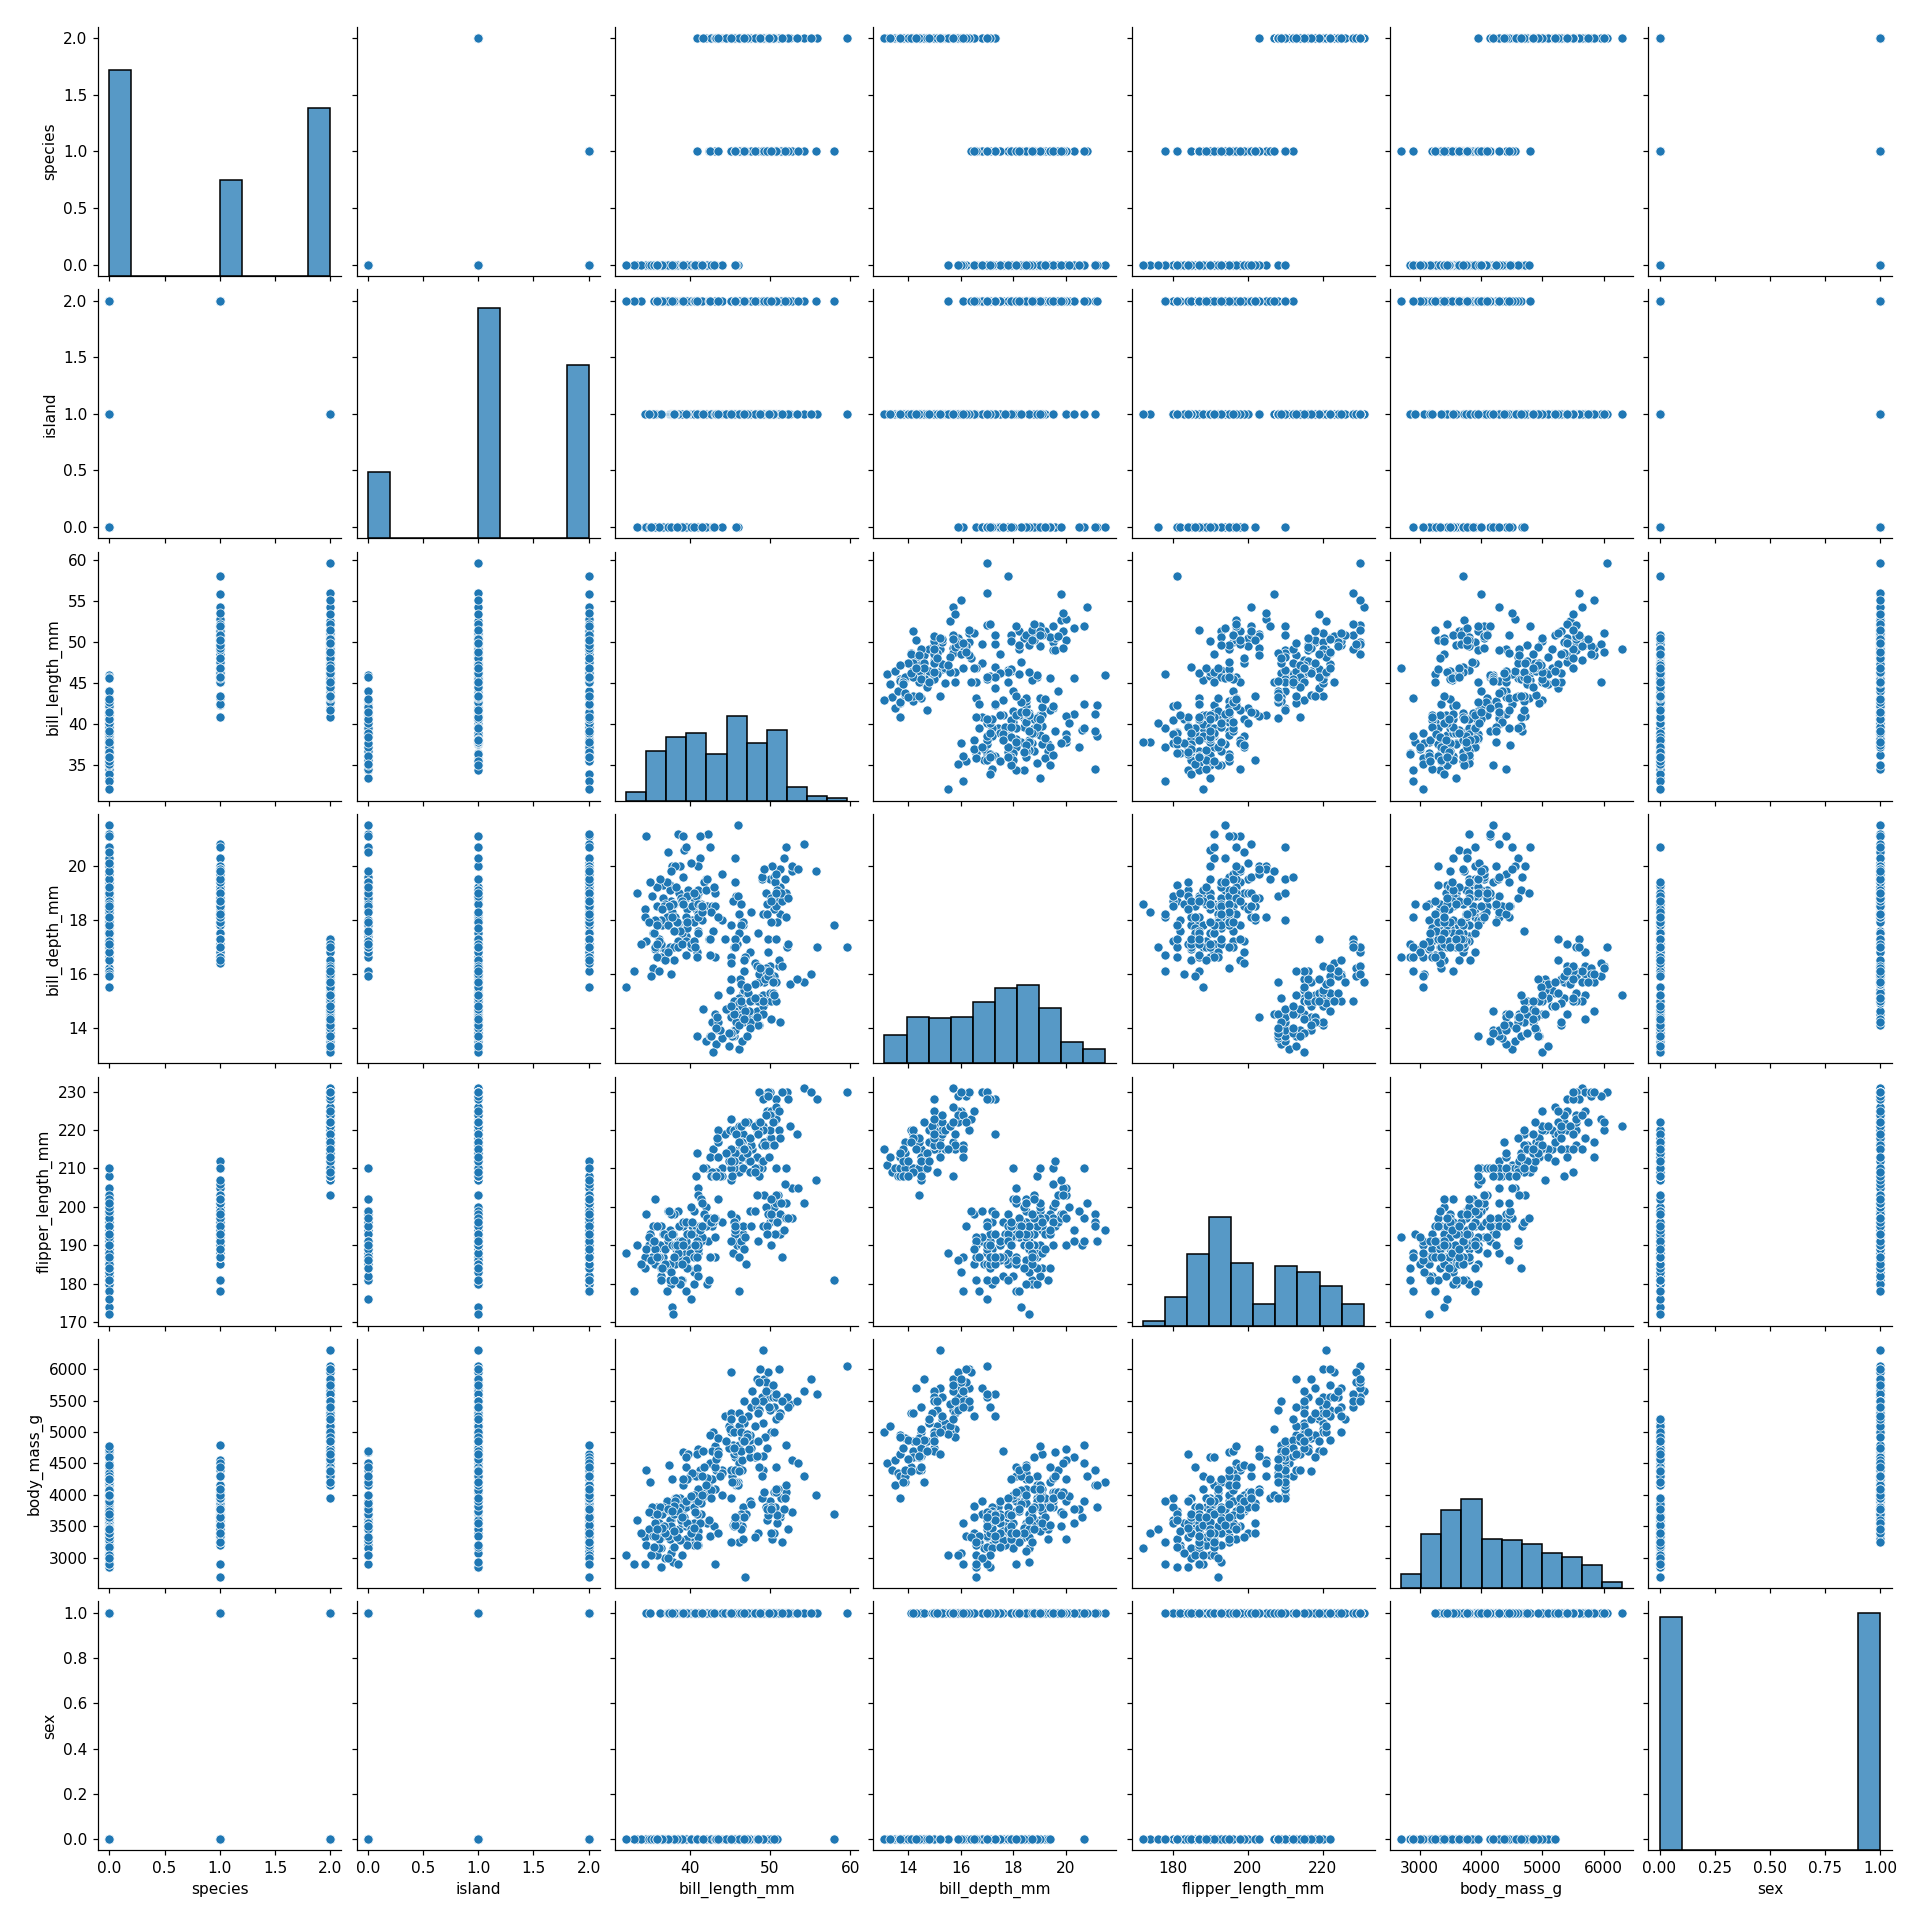

In [15]:
sns.pairplot(df)

### It appears there is no correlation between penguin sex and either of penguin species or island where they are found.

# Model Building

In [16]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [17]:
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df["sex"]

In [18]:
selector = VarianceThreshold()
X_transformed = selector.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [42]:
clf1 = LogisticRegression(random_state=0, C=1).fit(X_train, y_train)
clf2 = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
clf3 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
clf4 = SVC(random_state=0).fit(X_train, y_train)

In [22]:
y_test.ndim

1

In [43]:
y_pred = clf1.predict(X_test)
accuracy_score(y_test, y_pred)

0.8928571428571429

In [31]:
y_pred = clf2.predict(X_test)
accuracy_score(y_test, y_pred)

0.8809523809523809

In [28]:
y_pred = clf3.predict(X_test)
accuracy_score(y_test, y_pred)

0.8809523809523809

In [33]:
y_pred = clf4.predict(X_test)
accuracy_score(y_test, y_pred)

0.7857142857142857

In [49]:
roc_auc_score(y_test, clf1.predict(X_test))

0.8864705882352941

In [50]:
roc_auc_score(y_test, clf2.predict(X_test))

0.8764705882352941

In [48]:
roc_auc_score(y_test, clf3.predict(X_test))

0.8764705882352941

In [54]:
clf2.predict_proba(X_test)

array([[0.73632274, 0.26367726],
       [0.81939098, 0.18060902],
       [0.09113704, 0.90886296],
       [0.28673342, 0.71326658],
       [0.54762095, 0.45237905],
       [0.42050847, 0.57949153],
       [0.65833945, 0.34166055],
       [0.71042698, 0.28957302],
       [0.09687925, 0.90312075],
       [0.71772695, 0.28227305],
       [0.10345534, 0.89654466],
       [0.30032766, 0.69967234],
       [0.81939098, 0.18060902],
       [0.73110659, 0.26889341],
       [0.6720431 , 0.3279569 ],
       [0.81939098, 0.18060902],
       [0.54419506, 0.45580494],
       [0.81387776, 0.18612224],
       [0.11797919, 0.88202081],
       [0.81939098, 0.18060902],
       [0.81939098, 0.18060902],
       [0.81939098, 0.18060902],
       [0.27991996, 0.72008004],
       [0.78725029, 0.21274971],
       [0.78183408, 0.21816592],
       [0.47390928, 0.52609072],
       [0.25164198, 0.74835802],
       [0.62321056, 0.37678944],
       [0.38411416, 0.61588584],
       [0.69351072, 0.30648928],
       [0.

In [64]:
y_pred = clf1.predict(X_test)
print(list(y_pred))

[0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]


In [63]:
print(list(y_test))

[0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1]


In [65]:
y_pred == y_test

62      True
60      True
283     True
107     True
65      True
       ...  
228     True
206     True
260     True
263    False
337     True
Name: sex, Length: 84, dtype: bool

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
tree.plot_tree(clf3)
plt.show()
fig.tight_layout()
fig.savefig("tree_plot.png")